# Recommandation par filtrage collaboratif
## Realise par :   Donovan Daniel Del Valle Jimenez 

In [5]:
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math 
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import itertools
from scipy.stats import pearsonr
from statistics import mean

Données : 

In [6]:
#Chargement des données
data_file = 'ml-100k/u.data'
data = pd.read_csv(data_file, sep='\t', names=['user_id','movie_id','rating','timestamp'])
data_file = 'ml-100k/u.item'
movies_info = pd.read_csv(data_file, sep='|', names=['movie_id', 'movie title','release date', 'video release date','IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], encoding='latin-1')
movies_info = movies_info.drop(['video release date','IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], axis = 1)
data_file = 'ml-100k/u.user'
users = pd.read_csv(data_file, sep='|', names=["user_id", "Age", "Gender", "Occupation", "Zip-code"])
data_file = 'ml-100k/u.occupation'
occupation = pd.read_csv(data_file, names=["Occupation"])
movies_info.head()
movies_info.shape

(1682, 3)

In [7]:
# Getting the rating given by a user to a movie.
def get_rating_(userid,movieid):
    return ( data_train.loc[( data_train.user_id==userid) & ( data_train.movie_id == movieid),'rating'].iloc[0])# Getting the list of all movie ids the specified user has rated.
def get_movieids_(userid):
    return ( data_train.loc[( data_train.user_id==userid),'movie_id'].tolist())# Getting the movie titles against the movie id.
def get_movie_title_(movieid):
    return (movies.loc[(movies.movie_id == movieid),'movie_title'].iloc[0])

In [8]:
i=1
mae_ar_train = []
rmse_ar_train = []
mae_ar_test = []
rmse_ar_test = []

for i in range(1, 6):
    route = 'ml-100k/u'+str(i)+'.base'
    print('Pour ', route)
    data_train = pd.read_csv(route, sep='\t', names=['user_id','movie_id','rating','timestamp'])
    route = 'ml-100k/u'+str(i)+'.test'
    print('et ', route)
    data_test = pd.read_csv(route, sep='\t', names=['user_id','movie_id','rating','timestamp'])

    data_train = data_train.drop(columns=['timestamp']);
    data_train = data_train.loc[0:10000];
    data_test = data_test.drop(columns=['timestamp']);
    data_test = data_test.loc[0:10000];

    #user_corr = data_train.groupby('user_id')['rating'].agg(['count','mean']).reset_index().round(1)
    #movies_base = pd.crosstab(data_train['movie_id'], data_train['user_id'], values = data_train['rating'], aggfunc = 'sum')
    #movies_base = movies_base.fillna(0)
    #users = data_train['user_id'].unique()

    final_dataset = data_train.pivot(index='movie_id',columns='user_id',values='rating')
    matrix_corr = final_dataset.corr(method="pearson")
    final_dataset_w = final_dataset*matrix_corr
    
    y_predict = []

    for i in data_train.index:
        final_dataset_w['index_c']=final_dataset_w.index
        dataA=final_dataset_w.loc[final_dataset_w.index_c==data_train['movie_id'][i]]
        dataA = dataA.sum()
        data2 = final_dataset_w.loc[final_dataset_w.index_c==data_train['movie_id'][i]]
        result = data2.dropna()
        data3 = matrix_corr[result.index].abs()
        data3['index_c']=data3.index
        dataB = data3.loc[data3.index_c==data_train['movie_id'][i]].sum()
        dataB = dataB.sum()
        if(dataB>0): 
            y_predict.append(float(dataA.sum()/dataB.sum()))
        else: 
            y_predict.append("0")
    
    y_train=data_train.loc[:, ['rating']]
    y_test= data_test.loc[:, ['rating']]
    
    mse = mean_squared_error(y_train, y_predict)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_train, y_predict)
    print("mae_train:", mae)
    print("rmse:_train", rmse)
    mae_ar_train.append(mae)
    rmse_ar_train.append(rmse)
    
    final_dataset = data_test.pivot(index='movie_id',columns='user_id',values='rating')
    matrix_corr = final_dataset.corr(method="pearson")
    final_dataset_w = final_dataset*matrix_corr
    
    y_predict = []

    for i in data_train.index:
        final_dataset_w['index_c']=final_dataset_w.index
        dataA=final_dataset_w.loc[final_dataset_w.index_c==data_test['movie_id'][i]]
        dataA = dataA.sum()
        data2 = final_dataset_w.loc[final_dataset_w.index_c==data_test['movie_id'][i]]
        result = data2.dropna()
        data3 = matrix_corr[result.index].abs()
        data3['index_c']=data3.index
        dataB = data3.loc[data3.index_c==data_test['movie_id'][i]].sum()
        dataB = dataB.sum()
        if(dataB>0): 
            y_predict.append(float(dataA.sum()/dataB.sum()))
        else: 
            y_predict.append("0")
            
    mse = mean_squared_error(y_test, y_predict)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_test, y_predict)
    print("mae_test:", mae)
    print("rmse:_test", rmse)
    mae_ar_test.append(mae)
    rmse_ar_test.append(rmse)
    

Pour  ml-100k/u1.base
et  ml-100k/u1.test


C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


mae_train: 3.396871123448538
rmse:_train 4.335806755930569


C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


mae_test: 3.267713966691211
rmse:_test 4.331293803715395
Pour  ml-100k/u2.base
et  ml-100k/u2.test


C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


mae_train: 3.454900053264825
rmse:_train 4.221579304735237


C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


mae_test: 3.225561572389248
rmse:_test 4.559795740696768
Pour  ml-100k/u3.base
et  ml-100k/u3.test


C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


mae_train: 3.523954258282427
rmse:_train 4.58561014984372


C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


mae_test: 2.937632430050758
rmse:_test 3.400920902480804
Pour  ml-100k/u4.base
et  ml-100k/u4.test


C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


mae_train: 3.6025382728829465
rmse:_train 4.93687047505449


C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


mae_test: 2.7403060886482757
rmse:_test 2.967223309756575
Pour  ml-100k/u5.base
et  ml-100k/u5.test


C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


mae_train: 3.578374026090052
rmse:_train 4.669533747574818
mae_test: 2.71473907464754
rmse:_test 2.9496703699113027


C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
C:\Users\Fdelv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


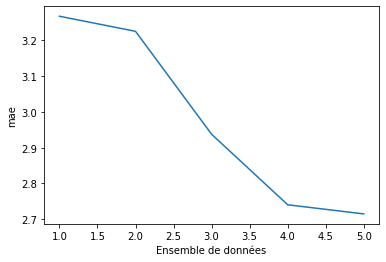

In [9]:
plt.plot(range(1,6), mae_ar_test)
plt.ylabel("mae")
plt.xlabel("Ensemble de données")
plt.show()

In [164]:
mean(mae_ar_test)

2.9771906264854064

In [155]:
print("MAE pour l'ensemble de données Train 1-5", mae_ar_train)
print("MAE pour l'ensemble de données Test 1-5", mae_ar_test)

MAE pour l'ensemble de données Train 1-5 [3.396871123448538, 3.454900053264825, 3.523954258282427, 3.6025382728829465, 3.578374026090052]
MAE pour l'ensemble de données Test 1-5 [3.267713966691211, 3.225561572389248, 2.937632430050758, 2.7403060886482757, 2.71473907464754]


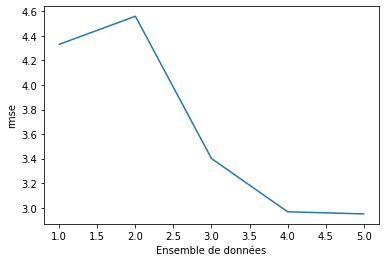

In [159]:
plt.plot(range(1,6), rmse_ar_test)
plt.ylabel("rmse")
plt.xlabel("Ensemble de données")
plt.show()

In [163]:
mean(rmse_ar_test)

3.641780825312169

In [2]:
#matrix_corr.head()

In [10]:
final_dataset.head()
final_dataset.shape

(1251, 711)

In [11]:
#final_dataset_w.head()

In [1]:
#print('Pearson Corelation between user ids 11 & 30: {}'.format(pearson_correlation_score(1,6)))

References
https://betterprogramming.pub/building-a-movie-recommendation-engine-for-beginners-7161430e35b9
https://analyticsindiamag.com/how-to-build-your-first-recommender-system-using-python-movielens-dataset/